# 1.0. Import

In [32]:
#Bibliotecas utilizadas no trabalho
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
#Importando o DataSet
df_concreto = pd.read_csv("./Bancos_utilizados/Concretos.csv")

In [10]:
df_concreto.head()

,Cimento,EscóriadeAltoForno,CinzasVolantes,Agua,Superplastificante,AgregadoGrosso,Agregadofino,Idade,Resistência
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# 2.0. Limpeza dos Dados

## 2.1. Dados Faltando e Descrição dos dados
Vamos ver se possui alguma linha em branco e a descrição de cada coluna.

In [11]:
df_concreto.isnull().sum()

Cimento               0
EscóriadeAltoForno    0
CinzasVolantes        0
Agua                  0
Superplastificante    0
AgregadoGrosso        0
Agregadofino          0
Idade                 0
Resistência           0
dtype: int64

Podemos ver que nosso DataSet não possui nenhuma linha em branco.

Agora vamos dar uma olhada na descrição geral dos dados. Aqui podemos ver o range das features já para perceber algum potencial outlier.

In [12]:
df_concreto.describe()

,Cimento,EscóriadeAltoForno,CinzasVolantes,Agua,Superplastificante,AgregadoGrosso,Agregadofino,Idade,Resistência
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## 2.2. Dados repetidos
Eliminado linhas repetidas:

In [13]:
df_concreto = df_concreto.drop_duplicates()

In [14]:
df_concreto.shape

(1005, 9)

Podemos ver que havia 25 linhas repetidas que foram apagadas. Saiu de 1030 para 1005 instancias.

## 2.3. Tempo
Devido a 28 dias ser o tempo padrão utilizado para a cura do concreto, vamos optar por apenas manter as linhas que possuem Idade de 28 dias pois representa o padrão que o modelo irá encontrar.

In [15]:
df_concreto = df_concreto.loc[(df_concreto['Idade'] == 28)]

In [16]:
df_concreto.shape

(419, 9)

Como podemos ver o DataSet ficou com 419 linhas, contra 1005 anteriormente.

Agora podemos remover a coluna Idade já que temos apenas 28 dias como Idade.

In [17]:
df_concreto = df_concreto.drop("Idade", axis=1)

## 2.4. Resistencia
Vamos manter apenas as resistencias que variam de 15 a 50 Mpa, pois representam os valores de concretos convencionais que iremos utilizar.

In [18]:
df_concreto = df_concreto.loc[(df_concreto['Resistência'] >= 15) & (df_concreto['Resistência'] <= 50)]

Quantos dados sobraram:

In [19]:
df_concreto.shape

(329, 8)

Agora nossos dados possuem apenas 329 linhas. 

Descrição dos dados apos a limpeza e salvar em uma pasta:

In [20]:
descricao = df_concreto.describe()
descricao = descricao.T
descricao = descricao[['min','max','mean','std']]
descricao

,min,max,mean,std
Cimento,102.00,516.0,242.660182,87.715278
EscóriadeAltoForno,0.00,359.4,89.677204,89.497098
CinzasVolantes,0.00,200.1,64.733435,65.821879
Agua,121.80,247.0,186.715805,17.693153
Superplastificante,0.00,22.1,6.183891,5.025437
AgregadoGrosso,801.00,1145.0,958.134650,80.679333
Agregadofino,594.00,945.0,763.814590,70.913377
Resistência,15.09,49.9,32.363343,8.524214


Por ultimo vamos exportar o banco limpo.

In [21]:
df_concreto.to_csv("./Bancos_utilizados/Bancos_apos_filtragem/train.csv",index=False)

# 3.0. Analise e Insights
Vamos tentar obter insights do nosso dataset. Esses insights vao ser diretamente aplicados nos proximos.

## 3.1. Analise de algumas features
Vamos analisar algumas features consideradas mais importantes.

### 3.1.1. Cimento

c:\Projetos_git\Concreto\venv_concreto\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cimento'>

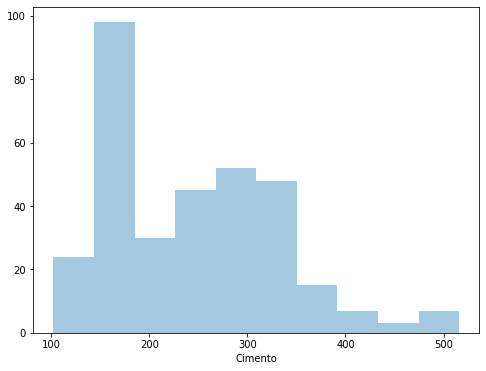

In [22]:
plt.figure(figsize=(8,6))
sns.distplot(df_concreto.Cimento, kde=0)

Conforme vimos na descrição na parte anterior, o cimento varia de 100-500 aproximadamente. Mas nos nao conseguimos tirar nenhuma conclusão atraves desse grafico.

Vamos ver se a quantidade de cimento é diretamente proporcional a resistencia, ou seja se aumentarmos a quantidade de cimento, nos aumentamos a resistencia:

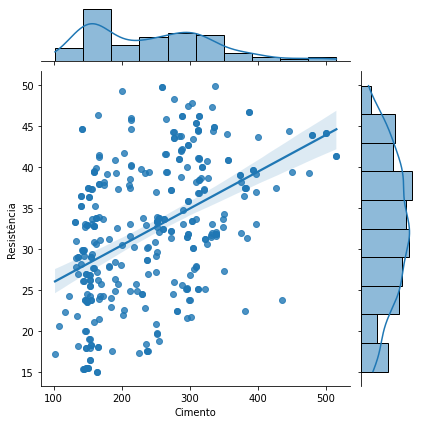

In [23]:
sns.jointplot(x='Cimento', y='Resistência', data=df_concreto, kind="reg")

### 3.1.2. Água

<AxesSubplot:xlabel='Agua'>

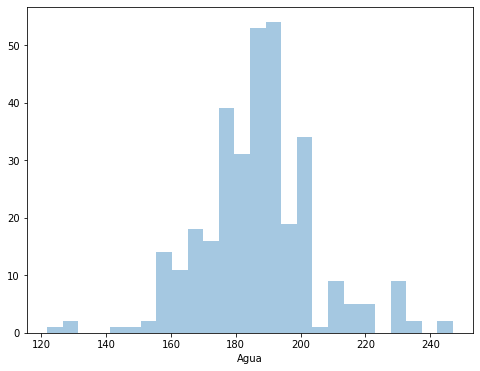

In [29]:
plt.figure(figsize=(8,6))
sns.distplot(df_concreto.Agua, kde=0)

Aqui nos vemos que está bem normalizado os dados da água. Nos temos um maior uso entre 180 e 200.

**Água x Resistência**

Agora vamos dar uma olhada em como a água se comporta em relação a resistencia:

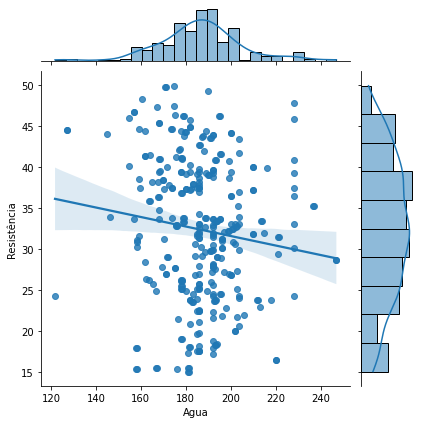

In [25]:
sns.jointplot(x='Agua', y='Resistência', data=df_concreto, kind="reg")

Como podemos ver, ao contrario do cimento a relação da água com a resistencia é inversamente proporcional.

**Água x Cimento**

Agora vamos dar uma olhada na quantidade de água em relação ao cimento. Provavelmente quanto mais cimento, mais água:

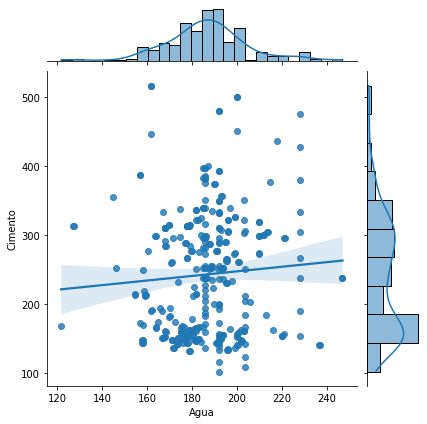

In [26]:
sns.jointplot(x='Agua', y='Cimento', data=df_concreto, kind="reg")

Podemos ver que a questão anterior é confirmada, a uma alta correlação entre o tempo e a resistência. Uma ideia pode ser separar os dados por tempo, para utilizar apenas um, retirando assim o tempo como uma feature, pois precisamos de uma resistencia absoluta sem relação ao tempo.

## 3.2. Outliers

Vamos dar uma olhada nos possiveis outliers.

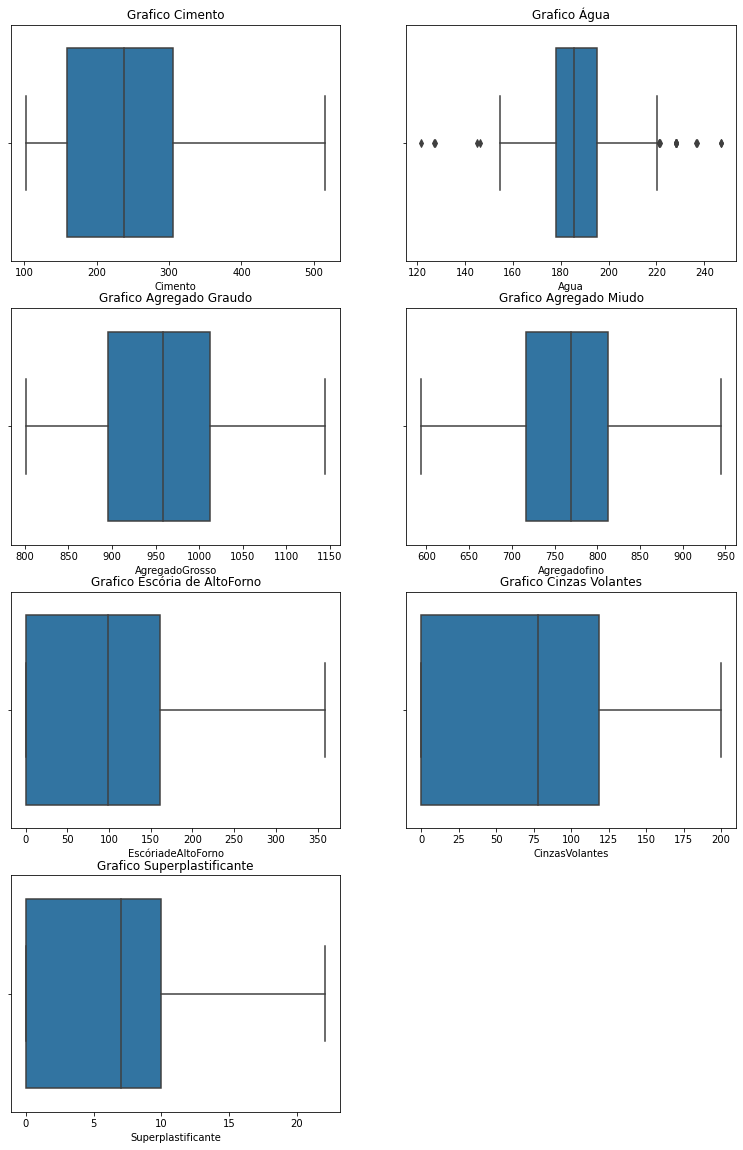

In [31]:
plt.figure(figsize=(13,20))
plt.subplot(4,2,1)
sns.boxplot(x=df_concreto['Cimento'])
plt.title("Grafico Cimento")

plt.subplot(4,2,2)
sns.boxplot(x=df_concreto['Agua'])
plt.title("Grafico Água")


plt.subplot(4,2,3)
sns.boxplot(x=df_concreto['AgregadoGrosso'])
plt.title("Grafico Agregado Graudo")


plt.subplot(4,2,4)
sns.boxplot(x=df_concreto['Agregadofino'])
plt.title("Grafico Agregado Miudo");

plt.subplot(4,2,5)
sns.boxplot(x=df_concreto['EscóriadeAltoForno'])
plt.title("Grafico Escória de AltoForno");

plt.subplot(4,2,6)
sns.boxplot(x=df_concreto['CinzasVolantes'])
plt.title("Grafico Cinzas Volantes");

plt.subplot(4,2,7)
sns.boxplot(x=df_concreto['Superplastificante'])
plt.title("Grafico Superplastificante");

Temos alguns possiveis outliers na variavel agua para conferirmos.

In [43]:
feature_data = df_concreto['Agua']
Q1 = np.percentile(df_concreto['Agua'], 25.)
Q3 = np.percentile(df_concreto['Agua'], 75.) 
IQR = Q3-Q1 
possiveis_outliers = df_concreto[~((df_concreto['Agua'] >= Q1 - 1.5*IQR) & (df_concreto['Agua'] <= Q3 + 1.5*IQR))]
possiveis_outliers

,Cimento,EscóriadeAltoForno,CinzasVolantes,Agua,Superplastificante,AgregadoGrosso,Agregadofino,Resistência
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,39.29
14,304.0,76.0,0.0,228.0,0.0,932.0,670.0,47.81
28,427.5,47.5,0.0,228.0,0.0,932.0,594.0,37.43
36,237.5,237.5,0.0,228.0,0.0,932.0,594.0,30.08
59,332.5,142.5,0.0,228.0,0.0,932.0,594.0,33.02
68,190.0,190.0,0.0,228.0,0.0,932.0,670.0,40.86
226,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,24.24
316,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,33.94


Algumas instancias do conjunto possuem quantidade de cimento baixa para a resistência apresentada, no entanto, não achamos nada que justifique a classificação das linhas como outliers.

## 3.3. Correlação

Vamos analisar a correlação para ver quais as features mais ajudam a explicar o fenomeno e ver se existe variaveis colineares.

Variaveis colineares são aqueles que tem alta corrrelação com outra. Essas variaveis podem diminuir a aprendizagem do modelo, diminuir a interpretabilidade do modelo e diminuir o desempenho de generalização no conjunto de teste.

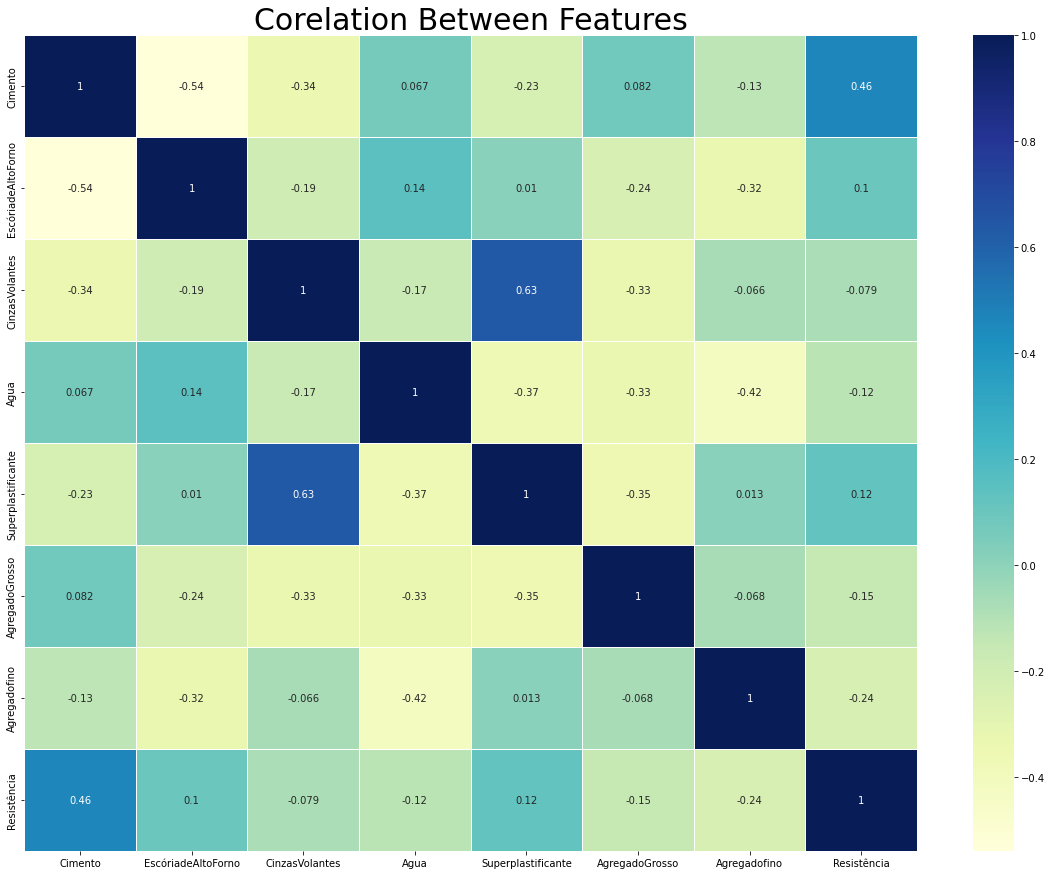

In [44]:
X = df_concreto.drop(['Resistência'], axis=1)
y = df_concreto['Resistência']

test_corr = X.copy()
test_corr['Resistência'] = y

plt.rcParams['figure.figsize'] = (20, 15) 
sns.heatmap(test_corr.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

Podemos ver que não temos variveis com correlação acima de 0.8, o que é um treshold aceitavel para colineares.

Vamos criar uma tabela agora para ver quais variaveis possuem mais relação com a resistencia:

In [45]:
corr_matrix = df_concreto.corr().abs()
corr_matrix

,Cimento,EscóriadeAltoForno,CinzasVolantes,Agua,Superplastificante,AgregadoGrosso,Agregadofino,Resistência
Cimento,1.000000,0.539787,0.338277,0.067164,0.227554,0.081729,0.128512,0.460541
EscóriadeAltoForno,0.539787,1.000000,0.189448,0.143183,0.010479,0.238554,0.324380,0.100701
CinzasVolantes,0.338277,0.189448,1.000000,0.166306,0.634714,0.327709,0.065864,0.078618
Agua,0.067164,0.143183,0.166306,1.000000,0.370762,0.327608,0.417546,0.120138
Superplastificante,0.227554,0.010479,0.634714,0.370762,1.000000,0.354946,0.012820,0.124153
AgregadoGrosso,0.081729,0.238554,0.327709,0.327608,0.354946,1.000000,0.068268,0.149414
Agregadofino,0.128512,0.324380,0.065864,0.417546,0.012820,0.068268,1.000000,0.237149
Resistência,0.460541,0.100701,0.078618,0.120138,0.124153,0.149414,0.237149,1.000000


Podemos ver que cimento tem alta correlação ficando em primeiro, depois temos Agregado miudo, Agregado graudo e Superplastificante.